<h1><center><font size="6">Predicting Telco Customer Churn</font></center></h1>

<h3><center><font size="4"> https://www.kaggle.com/blastchar/telco-customer-churn </font></center></h2>

In [52]:
# All of these are going to be done

# Resampling data comparison

# Data Cleansing using custom Python functions
# Identification of bad columns: those with nulls, blanks, constant values or duplicated features
# Prefix/Suffix removal
# Alphanumeric column splitting
# Blank space conversion to np.nan

# Feature engine open source package from Soledad (Udemy instructor)
# Null imputation using Median (continuous features) & Mode(categorical features)
# Reducing cardinality:Discretization (continuous features) & Rare label binning (categorical features)
# Categorical feature Encoding (Label + Ordinal encoding)

<a id="top"></a> <br>
## Table of Contents
1. [Introduction](#1)

1. [Initialization](#2)
    1. [Load Packages](#21)
    1. [Define Metadata](#22)
    
1. [Load Data & Validate](#3)
    
1. [Data Skewness Correction](#4)
    1. [Prepping before resampling](#41)
        1. [Import cleaned dataframe](#411)
        1. [Feature Target and Train Test Split](#412)
        1. [Initializing Metrics Capture](#413)
        1. [Import Custom Test Functions](#414)
    1. [Resampling Strategies Comparison](#42)
        1. [Resampling Method1: Undersampling - Random Undersampling](#421)
        1. [Resampling Method2: Oversampling - SMOTE](#422)
        1. [Resampling Method3: Hybrid Oversampling and Undersampling using SMOTEENN](#423)
        1. [Resampling Method4: Custom function to oversample at different rates](#424)
    
1. [Data Cleansing & EDA for ML Generalizability](#5)
    1. [Pre-cleaning](#51)
        1. [Identify Bad columns](#511)
        1. [Convert Blanks to np.nan](#512)
        1. [Convert data types - string to float](#513)
        1. [Update Bad columns list](#514)
    1. [EDA for ML Generalizability](#52)
        1. [Selecting top features](#521)
        1. [EDA - Numerical Columns](#522)
        1. [Outlier Definition, Detection & Removal](#523)
    
1. [Data Signal Amplification](#6)
    1. [Data Prep - Feature Target & Train Test Split](#62)
    1. [Handling Null Values](#62)
        1. [Pre-Imputation](#621)
        1. [Imputation](#622)
        1. [Performance Testing](#623)
    1. [Variance Reduction](#63)
        1. [Binning - Numerical Feature](#631)
        1. [Performance Testing](#632)
        1. [Rare Label Encoding - Categorical Features](#633)
        1. [Performance Testing](#634)
    
1. [Conclusion](#7)

1. [References](#8)

## <a id='1'>Introduction</a>  

Continuing on from the previous week, the aim here is to improve upon our baseline model performance by focussing on the data

## <a id='2'>Initialization</a>  

### <a id='21'>Load Packages</a>  



Load the minimum number of packages to get started and add more as we go along

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# This is to suppress any deprecation warnings 

import os

import sys
sys.path.append("/home/paperspace/Kaggle Grandmaster/Udemy Superstar/Classification") # Adds higher directory to python modules path.

### <a id='22'>Define Metadata</a>  

In [2]:
# Define the name of the target class column here instead of manually typing it out everywhere
target_class_name = 'Churn'

# Fill in the names of what you want to call the 0 and 1 class
labels = ['No', 'Yes']

input_file_name =  'WA_Fn-UseC_-Telco-Customer-Churn.csv'

intermediate_data_path = '../intermediate data/'

# This will be used to compare resampling techniques
clean_df_file_name = intermediate_data_path + 'day1_cleaned_df_output_20200501.pkl'

output_df_file_name = 'week2_cleaned_df_output_' 

# Enter the date in which this notebook is run
export_date = '20200504'

In [3]:
# Check ou tthe names of the files in the input folder that we need to load as dataframe
import os
print(os.listdir('../input'))
# This will list all the files in this folder

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


## <a id='3'>Load Data & Validate</a>  

In [4]:
# Lets reload the same data as Week 1 because we deleted the rows containing the blanks from the TotalCharges column

In [5]:
df = pd.read_csv('../input/' + input_file_name, index_col='customerID')
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6993-YCOBK,Male,0,Yes,Yes,60,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,110.60,6586.85,No
1299-AURJA,Female,0,Yes,Yes,70,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.70,1685.9,No
8058-DMYRU,Male,1,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,4931.8,No
3374-PZLXD,Male,0,No,No,34,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,675.6,No
2947-DOMLJ,Male,0,No,Yes,1,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,50.60,50.6,Yes



Lets check the head & tail to make sure there is nothing going on

In [6]:
df.head(3)
# What you are checking here is whether there are some unwanted headers from teh input file that 
# can corrupt our data
# If found, either open the file and manually delete it or only load the relevant columns

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [7]:
df.tail(3)
# similar logic here

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


No trouble with loading the data. Both the head and tail are clean

We are going to hold off on the outlier detection and removal until after the data augmentation

## <a id = 4> Data Skewness Correction

Data always beats algorithm. 

Given that our dataset is heavily skewed in favor of the negative class (ie non-fraud),
any technique that brings the ratio closer to 50:50 should theoretically improve the performance.

The theoretical reason for favoring the 50:50 ratio is that the results will be no worse than what was obtained with natural class distributions.

https://www.researchgate.net/publication/2364670_The_Effect_of_Class_Distribution_on_Classifier_Learning_An_Empirical_Study

Broadly there are 2 approaches to data skewness correction: undersampling and oversampling
    
In Undersampling, we throw away the negative class until the remaining data is balanced.

In Oversampling, we sample  repeatedly the positive class until the synthetic data is balanced

There is also the hybrid approach where we sample both classes simultaneously until the minority class reaches a threshold and I will also introduce a custom function to generate samples.

But first, lets do some groundwork ....

### <a id = 41> Prepping before resampling

#### <a id = 411> Import cleaned dataframe

This is just to compare the resampling techniques and doesnt affect the subsequent steps. Hence use the cleaned dataset from last week

In [8]:
import pickle

infile = open(clean_df_file_name,'rb')
clean_df = pickle.load(infile)
infile.close()


#### <a id = 412> Feature Target and Train Test Split


Why should we do the train test split here rather than just before the modelling?

Because the data augmentation techniques should leave the Test set alone and only augment the train set. The Test set should be a valid representation of how the unseen unlabelled production data will occur during which time we wont have the luxury of correcting the imbalance


In [9]:
# Feature Target split
clean_X = clean_df.drop(target_class_name, axis=1)
clean_y = clean_df[target_class_name]

# split into train and test set and make sure to use the stratify = y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_X, clean_y, test_size=0.2, 
                                                    stratify=clean_y, random_state=42)

# These are the original dimensions and the class distributions
print(X_train.shape, X_test.shape, sum(y_train), sum(y_test))


(5625, 19) (1407, 19) 1495 374


#### <a id = 413> Initializing Metrics Capture

Let me initialize a dataframe to hold relevant metrics for each of the augmentation techniques we are going to try

In [10]:
sampling_strategy_metrics_df = pd.DataFrame(
columns = ['Pos_Precision','Pos_Recall','Pos_F1',
           'ROC AUC','FN','TP','FP','TN','Precision_at_Recall'],
index = ['Undersampling','Oversampling','Hybrid','Custom'])

sampling_strategy_metrics_df

# Depending on the business problem, one or more of these metrics will be more important.
# Here lets assume that the Recall is what we are interested in 
# as long as the Precision is not too far off
# Unlike balanced datasets, the ROC AUC is a poor indicator here 
# because the algorithm can get 'good' scores by just predicting
# everything as the majority class.

# The prefixes exist for the Precision, Recall and F1 
# because I am only interested in the positive class

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oversampling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <a id = 414> Importing Test Functions

Given that there are 4 techniques that I want to compare, its better to have a custom function that to avoid repeating code. I am going to create a wrapper around my metrics function to output the resampled train sets and test metrics

In [11]:
from helper_functions_comprehensive import resample_and_test_performance_function

### <a id = 42> Resampling Strategies Comparison

There are many techniques for undersampling, oversampling and the hybrid approach. One popular API is imblearn available at
https://imbalanced-learn.readthedocs.io/en/stable/api.html

In this notebook, I am going to pick one implementation for each approach and compare results. 
The reader is encouraged to try all

#### <a id = 411> Resampling Method1: Undersampling - RandomUnderSampler

In the first implementation, I am going to downsample my majority (negative) class using the RandomUnderSampler method as the name suggests, the algorithm randomly selects the minority class until the class ratio is the same

The reader is encouraged to select more sophisticated techniques available in imblearn API documentation

The size of the resampled train sets are as follows:
(2990, 19) 1495
Has a Test accuracy of 74.0 % 
              precision    recall  f1-score   support

          No       0.89      0.73      0.80      1033
         Yes       0.50      0.76      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407

The ROC AUC Score on Test set is 0.81
Confusion matrix, without normalization
[[753 280]
 [ 89 285]]


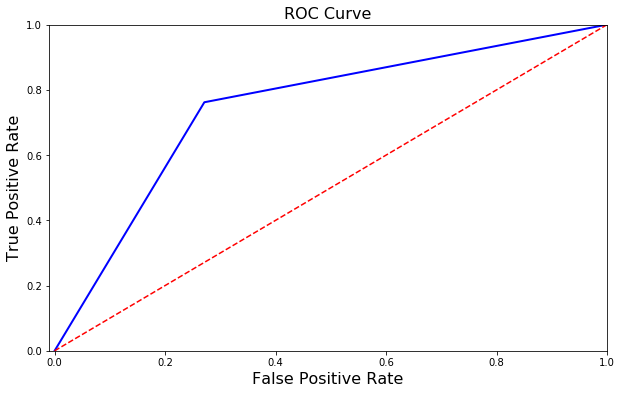

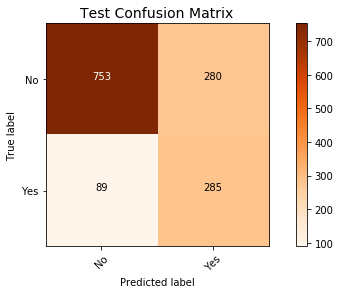

In [12]:
from imblearn.under_sampling import RandomUnderSampler

_,__, sampling_strategy_metrics_df.loc['Undersampling'] = resample_and_test_performance_function(
                    RandomUnderSampler(random_state=42), X_train, y_train, X_test, y_test, labels)

# Notice how the size of the downsampled dataset is exactly 
# twice as large as the number of minority positive class

In [13]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.504425,0.762032,0.607029,0.81,89,285,280,753,0.447075
Oversampling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The Precision at Recall is better than the baseline

If the modelling efforts were to stop now, business will likely choose the baseline model from day1
because the False Positives are significantly lower and likely outweigh any benefits from increased capture of True Frauds

#### <a id = 422>Resampling Method2: Oversampling - SMOTE

Next, I am going to try a popular oversampling technique for SMOTE
SMOTE stands for Synthetic Minority Over-sampling Technique and was presented in a 2002 paper here
https://jair.org/index.php/jair/article/view/10302/24590

this technique is theoretically superior to just oversampling with replacement for the minority class 
(the latter causes the decision tree to overfit)
In SMOTE, instead of sampling with replacement of the original minority class, synthetic new samples are generated
According to the article, Synthetic samples are generated in the following way: 

"Take the difference between the feature vector (sample)under consideration and its nearest neighbor. 
Multiply this difference by a random numberbetween 0 and 1, and add it to the feature vector under consideration.  
This causes the selection of a random point along the line segment between two specific features.  
This approach effectively forces the decision region of the minority class to become more general."

The size of the resampled train sets are as follows:
(8260, 19) 4130
Has a Test accuracy of 78.0 % 
              precision    recall  f1-score   support

          No       0.83      0.88      0.85      1033
         Yes       0.60      0.51      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

The ROC AUC Score on Test set is 0.81
Confusion matrix, without normalization
[[905 128]
 [182 192]]


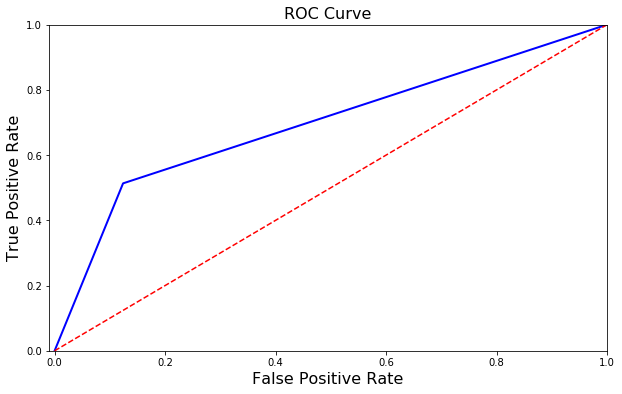

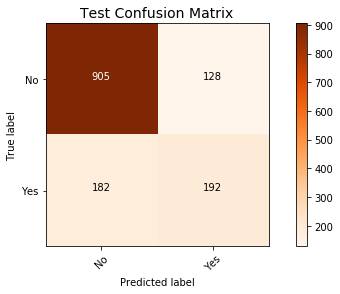

In [14]:
from imblearn.over_sampling import SMOTE

_,__, sampling_strategy_metrics_df.loc['Oversampling'] = resample_and_test_performance_function(
                                SMOTE(random_state=42), X_train, y_train, X_test, y_test, labels)

# Notice how the upsampled dataset is exactly twice as large as the number of minority positive class
# This is characteristic of SMOTE

In [15]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.504425,0.762032,0.607029,0.81,89,285,280,753,0.447075
Oversampling,0.6,0.513369,0.553314,0.81,182,192,128,905,0.431452
Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is also better than the baseline model

Next, we are going to explore how the performance is affected if we go with a combination of upsampling and undersampling

#### <a id = 423>Resampling Method3: Hybrid Oversampling and Undersampling using SMOTEENN

We are going to explore a strategy known as SMOTEENN
which combines the now-familiar SMOTE upsampling technique with ENN undersampling
https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.combine


ENN is Edited Nearest Neighbors which first oversamples both the minority and majority class until they are balanced.
Then the Tomek links are removed. This prevents the majority class from 'intruding' too deep into the minority class space
This is explained in the following paper https://pdfs.semanticscholar.org/c1a9/5197e15fa99f55cd0cb2ee14d2f02699a919.pdf

the original description of Tomek links is given in the IEEE paper from 1976
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4309452

The size of the resampled train sets are as follows:
(4711, 19) 2547
Has a Test accuracy of 77.0 % 
              precision    recall  f1-score   support

          No       0.88      0.78      0.83      1033
         Yes       0.54      0.72      0.62       374

    accuracy                           0.77      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.77      0.77      1407

The ROC AUC Score on Test set is 0.82
Confusion matrix, without normalization
[[809 224]
 [106 268]]


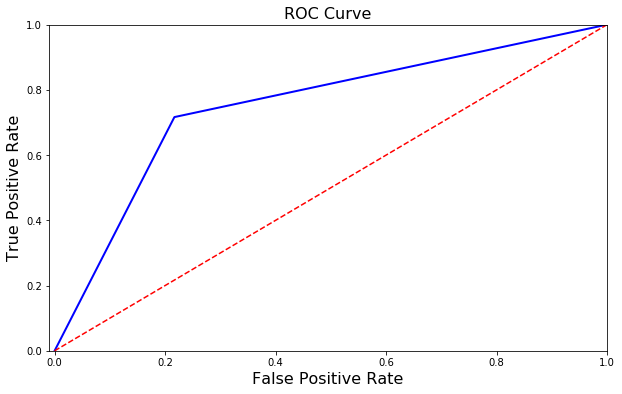

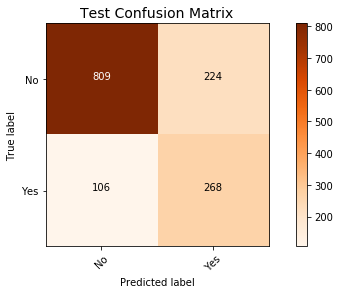

In [16]:
from imblearn.combine import SMOTEENN

# Note that unlike the previous 2 methods, SMOTEENN comes with the param for the sampling_strategy.
# The default is auto' which will select the minority class only but I chose to resample both classes

_,__, sampling_strategy_metrics_df.loc['Hybrid'] = resample_and_test_performance_function(
SMOTEENN(sampling_strategy = 'all' ,random_state=42), X_train, y_train, X_test, y_test, labels)

# Unlike the other resampling strategies, the resampled data size isnt easy to infer from the original data size

In [17]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.504425,0.762032,0.607029,0.81,89,285,280,753,0.447075
Oversampling,0.6,0.513369,0.553314,0.81,182,192,128,905,0.431452
Hybrid,0.544715,0.716578,0.618938,0.82,106,268,224,809,0.47392
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is better than the other two resampling techniques

#### <a id = 424>Resampling Method4: Custom function to oversample at different rates

In [18]:
# The generalized version of the oversampling is when we simultaneously upsample both the classes at different rates

In [19]:
from helper_functions_comprehensive import augment_data_function
X_resampled_train, y_resampled_train = augment_data_function(X_train, y_train, 
                    positive_upsampling_ratio=4, negative_upsampling_ratio=2)
print(X_resampled_train.shape,sum(y_resampled_train))

(14240, 19) 5980.0


Has a Test accuracy of 77.0 % 
              precision    recall  f1-score   support

          No       0.85      0.83      0.84      1033
         Yes       0.56      0.60      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407

The ROC AUC Score on Test set is 0.81
Confusion matrix, without normalization
[[857 176]
 [150 224]]


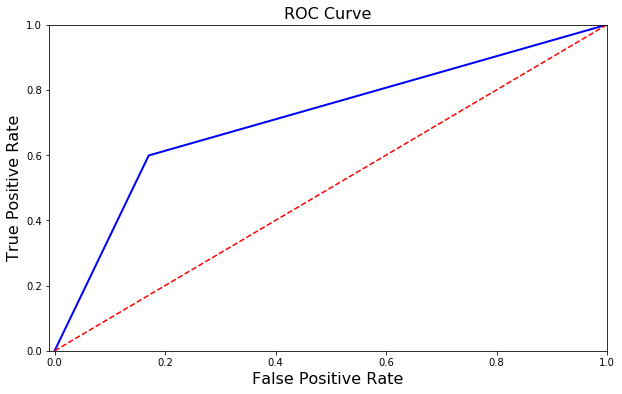

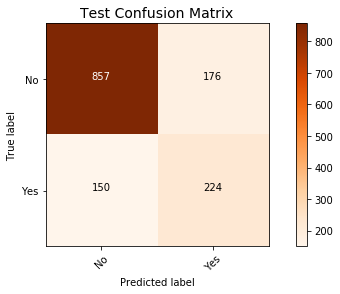

In [20]:
from helper_functions_comprehensive import test_rf_performance_function
sampling_strategy_metrics_df.loc['Custom'] = test_rf_performance_function(
            X_resampled_train, y_resampled_train, X_test, y_test, labels)

In [21]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.504425,0.762032,0.607029,0.81,89,285,280,753,0.447075
Oversampling,0.6,0.513369,0.553314,0.81,182,192,128,905,0.431452
Hybrid,0.544715,0.716578,0.618938,0.82,106,268,224,809,0.47392
Custom,0.56,0.59893,0.578811,0.81,150,224,176,857,0.43879


From now on choose the SMOTEENN

### Next steps

Now that we know what resampling technique to use and what is the benchmark performance to beat, lets bring back the raw dataset and clean it up

The cleaning techniques will be kept only if they beat the performance above on the test set after resampling the train set

## <a id = 5> Data Cleansing & EDA for ML Generalizability

There is a very significant chunk of data munging about to be done here to increase the data quality

### <a id = 51> Pre-cleaning setup

To even get the data to a format where more complex imputation can be applied, we need to clean it first ! Note that these pre-cleaning steps can be done on the entire dataset safely without worrying about data leakage (unlike some of the steps that come later)

So lets bring back the raw dataset and find the bad columns that need to be transformed

#### <a id = 511> Identify bad columns

In [22]:
from helper_functions_comprehensive import find_bad_columns_function

null_col_list, blank_space_col_list, constant_numeric_col_list, \
constant_non_numeric_col_list, duplicate_col_list = find_bad_columns_function(df)

Identified 0 features with atleast one null
Identified 1 features with atleast one blank space
Identified 0 numeric features that have quasi-constant values
Identified 0 non-numeric features that have quasi-constant values
Identified 0 features that are duplicates of other features


#### <a id = 512>  Convert blanks to np.nan

In [23]:
# Entries where the boolean condition is False are replaced with np.nan

for col in blank_space_col_list:
    
    print('There are {} blanks in column {}'.format((sum(df[col]==' ')), col))
    
    df[col].where(df[col]!=' ', other = np.nan, inplace = True)

    print('After conversion, there are {} blanks in column {}'.format((sum(df[col]==' ')), col))

There are 11 blanks in column TotalCharges
After conversion, there are 0 blanks in column TotalCharges


#### <a id = 513> Convert data types - string to float

In [24]:
# Convert these columns to strings, ints or floats depending on domain knowledge and intuition

destination_data_type_col_dict = {'TotalCharges':float}
# Change the TotalCharges column into float from str    

for col, data_type in destination_data_type_col_dict.items():
    df[col] = df[col].astype(data_type)
    
df.dtypes
# As seen below, the above columns have been successfully converted to the desired data types
# The good thing about pandas is that nulls in otherwise numerical columns are treated as numbers

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### <a id = 514> Update the bad columns lists

In [25]:
null_col_list, blank_space_col_list, constant_numeric_col_list, \
constant_non_numeric_col_list, duplicate_col_list = find_bad_columns_function(df)

# notice how there are no blanks anymore but instead we have the nulls?
# null_col_list will be later used for adding a Missing Indicator boolean feature

Identified 1 features with atleast one null
Identified 0 features with atleast one blank space
Identified 0 numeric features that have quasi-constant values
Identified 0 non-numeric features that have quasi-constant values
Identified 0 features that are duplicates of other features


### <a id = 52> EDA for ML Generalizability

This is the section where we deep dive into the data and do EDA. However I am only going to focus on the top features in the interests of time. The idea is to identify patterns in the data that will eventually make our model more powerful (either through Feature Engineering done in Day3 or removing data points because they are outliers which are unlikely to occur in Production data

#### <a id = 521> Selecting top features - all numerical features

For this dataset, since there are only 3 numerical features, there is no need to run a separate feature selection step for the numerical variables. We will hardcode these 3 features

In [26]:
numeric_col_list = ['tenure','MonthlyCharges','TotalCharges']

In [27]:
# Also the outlier detection and removal method that I followed assumes guassian distribution which is not true for anything. It maybe applicable to np.log(df['TotalCharges'])

#### <a id = 522> EDA - Numerical Features

This is meant to be the EDA section but we are going to just plot the distributions and display the rows in the dataframe where there are nulls to see if there is anything obvious

#### Visualizing Distributions of top features

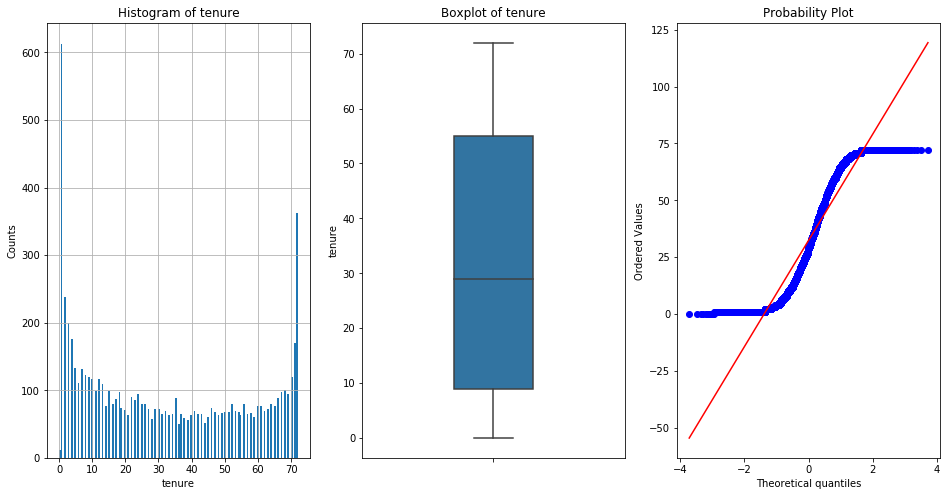

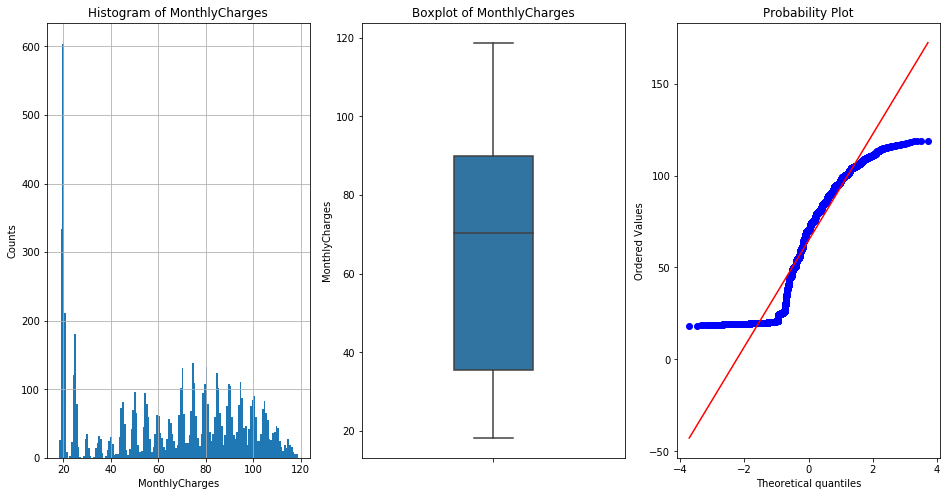

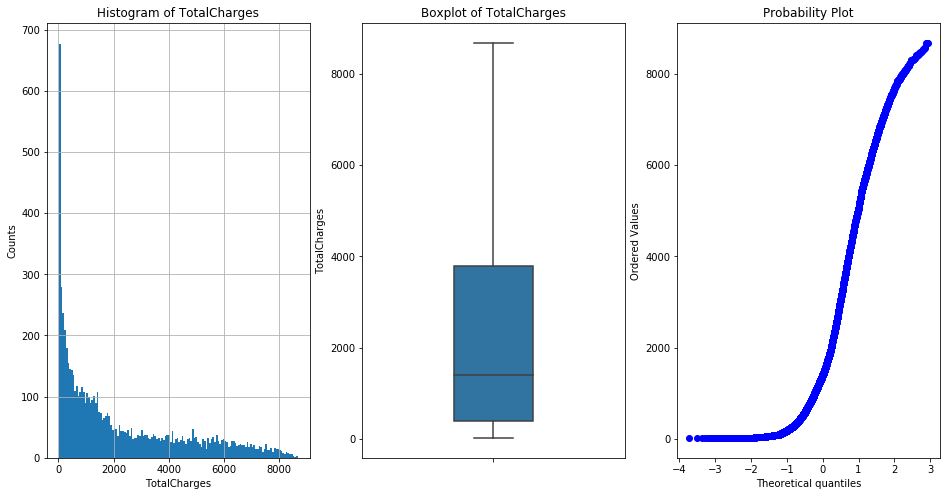

In [28]:
# use the cleaned dataframe from last week to plot the distribution if there are issues with df

from helper_functions_comprehensive import numerical_distribution_function

# I have established the bin sizes such that 
# approximately 50 points would fall in each bin if it was a uniform distribution 
# Play around with a few bin sizes to see if you see any patterns in the histogram
no_of_bins = len(df)//50

# Call the custom function to plot the histogram, boxplots and QQ Plots
numerical_distribution_function(df[numeric_col_list], bins=no_of_bins)


There is something unusual going on with the MonthlyCharges with 20 clusters seen, with each cluster occurring at intervals of 4. Its possible that despite being seemingly continuous variable, it can be converted to a categorical variable methods such as KMeans to cluster according to the median of each bin. We will explore that later in the notebook

Notice how the TotalCharges is a long tail distribution? We will use log transformation in another week to normalize this


#### Checking out null values

In [29]:
df[pd.isnull(df['TotalCharges'])]
# there is nothing obvious from the data apart from all the rows not having churn. 
#Given there are only 11 rows in the dataset, not sure if any conclusions could have been drawn anyway

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


#### <a id = 523> Outlier Definition, Detection & Removal

There are various qualitative and quantitative methods of defining outliers depending on the use case


Its not exactly obvious what constitutes an outlier, so we will keep all of the points rather than use the Z score or IQR method both of which need a gaussian distribution. In real life you would discuss with the business on what these distributions imply

## <a id='6'> Data Signal Amplification

### <a id = 61 > Data Prep - Feature Target & Train Test Split

Before we do any imputation or transformation, we should split it. This ensures that we are fitting with training data and transforming on the test data

In [30]:
X = df.drop(target_class_name, axis=1)
y = df[target_class_name]

# split into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Note optionally convert the pandas dataframe into a numpy array using to_numpy if you have a big data
# and want to model faster. Otherwise it doesnt matter which data structure you use

### <a id='62'>Handling Null Values</a> 

Handling Null Values gets its own section because it is both common and painful enough for all Data Scientists. Ideally the EDA process should give you insights on what the null values are and what needs to be done

Make sure to introduce the binary indicator before any imputation otherwise we will lose information about the missingness. 
This imputation syntax should work for all column types (num, cat, etc) as long as you have turned any weird values into nulls and they are within the null_col_list

#### <a id='621'>Pre-Imputation

#### - Introduce MissingIndicator column

In [31]:
# Note: to do ad-hoc creation of columns, we can also alternatively use 
# df[col+'_na']=np.where(df[col].isnull(),1,0) 
# But this wont be scalable when creating pipelines unless you are willing to write custom classes

In [32]:
# Since we dont know a-priori whether the data is Missing Not At Random (MNAR), we will introduce
# a new column to indicate the missingness of each feature that has a null value in it

import feature_engine.missing_data_imputers as mdi
# The alternative is to use the MissingIndicator() from sklearn

# set up the imputer
binary_imputer_obj = mdi.AddNaNBinaryImputer(variables=null_col_list)

# fit the imputer to the train set and transform both the train and test set
binary_imputer_obj.fit(X_train)
X_train = binary_imputer_obj.transform(X_train)
X_test = binary_imputer_obj.transform(X_test)

X_train.head()
# notice how the columns with nulls have an additional column with _na

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TotalCharges_na
customerID,,,,,,,,,,,,,,,,,,,,
4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,0
6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0
3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,0
2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,0
2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,1


If you have multiple columns that got imputed, then we need a round of feature reduction using the constant value removal and correlated features. Because its possible that some of the features have missing data that occur at the same time.

#### - Initialize functions

In [33]:
def add_transformed_col_function(original_dataframe, subset_dataframe):
    '''
    Args: Two dataframes
    Returns: The original dataframe where the subset of features have been replaced 
    with those that of the subset_dataframe
    
    '''
    for col in subset_dataframe.columns:
        del original_dataframe[col]
    
    # Concatenate the subset
    original_dataframe = pd.concat([original_dataframe, subset_dataframe], axis = 1)
    return original_dataframe

#### <a id='622'> Imputation

##### - Median imputation for numerical columns

- We are allowed to use the Median imputation because less than 5% of the data is missing
- If it is higher than that, the distribution will be impacted. In those circumstances, use 
more sophisticated techniques like using all the features to predict the missing value
- This imputation also makes the assumption that the data is Missing At Random (MAR)


In [34]:
# Get the column names of the continuous variables that have missing values
null_numeric_col_list = list(X_train[numeric_col_list].columns[X_train[numeric_col_list].isna().any()])

print('Number of columns imputed with Median = {}'.format(len(null_numeric_col_list)))

# set up the imputer with the median imputation method. You can also specify the variables
median_imputer_obj = mdi.MeanMedianImputer(imputation_method='median')

# fit the imputer but only on the train set
median_imputer_obj.fit(X_train[null_numeric_col_list])

# Transform on the Test set
median_imputed_train_df = median_imputer_obj.transform(X_train[null_numeric_col_list])
median_imputed_test_df = median_imputer_obj.transform(X_test[null_numeric_col_list])

median_imputed_train_df.head()
# This dataframe is a subset of the data that contains only the continuous numerical features

Number of columns imputed with Median = 1


,TotalCharges
customerID,
4223-BKEOR,1336.80
6035-RIIOM,5129.45
3797-VTIDR,23.45
2568-BRGYX,237.95
2775-SEFEE,1410.80


In [35]:
X_train = add_transformed_col_function(X_train, median_imputed_train_df)
X_test = add_transformed_col_function(X_test, median_imputed_test_df)

X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges_na,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,
4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,0,1336.80
6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,0,5129.45
3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,0,23.45
2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,0,237.95
2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1,1410.80


#### - Mode imputation for categorical columns

Same condition as before: only use when the nulls are less than 5%

Since we have already taken care of the continuous variables, anything else remaining will likely be categorical variable and hence can be imputed with the most frequently occurring value (Mode)

In [36]:
# Obtain all the features which we believe are categorical
# Note that it is perfectly okay if some of the numerical columns sneak in 
missing_ind_col_list = ['TotalCharges_na']
cat_col_list = list(set(X_train.columns) - set(numeric_col_list) - set(missing_ind_col_list))
cat_col_list

['PaymentMethod',
 'StreamingMovies',
 'DeviceProtection',
 'PaperlessBilling',
 'StreamingTV',
 'gender',
 'PhoneService',
 'TechSupport',
 'Contract',
 'MultipleLines',
 'OnlineBackup',
 'SeniorCitizen',
 'OnlineSecurity',
 'Dependents',
 'InternetService',
 'Partner']

In [37]:
# Create a list to store the subset of the categorical variables that have nulls
null_cat_col_list = X_train[cat_col_list].columns[X_train[cat_col_list].isna().any()].tolist()

print('Number of columns imputed with Mode = {}'.format(len(null_cat_col_list)))

mode_imputer_obj = mdi.FrequentCategoryImputer(variables=null_cat_col_list)

# fit the imputer
mode_imputer_obj.fit(X_train[null_cat_col_list])

mode_imputed_train_df = mode_imputer_obj.transform(X_train[null_cat_col_list])
mode_imputed_test_df = mode_imputer_obj.transform(X_test[null_cat_col_list])

mode_imputed_train_df.head()
# This dataframe is a subset of the data that contains only the continuous numerical features
# In this dataset, we dont have any null values in the categorical columns

Number of columns imputed with Mode = 0


""
customerID
4223-BKEOR
6035-RIIOM
3797-VTIDR
2568-BRGYX
2775-SEFEE


In [38]:
mode_imputed_test_df.head()

""
customerID
1024-GUALD
0484-JPBRU
3620-EHIMZ
6910-HADCM
8587-XYZSF


I have commented out the code below because neither the train nor test have any nulls on the data

In [39]:
# # Join the above subset of mode imputed features back into the original train/test set
# X_train = add_transformed_col_function(X_train, mode_imputed_train_df)
# X_test = add_transformed_col_function(X_test, mode_imputed_test_df)

# # I have included the code for completeness, but its not required for this dataset
# X_train.head()


#### <a id = 623> Performance Testing on Null Imputed dataframe

In [40]:
# Make it go through the whole test performance cycle
def modelling_workflow_function(X_train, X_test, y_train, y_test):
    
    '''
    Logic: merges the feature target train and test, converts the object columns into numbers,
    Then splits it back into feature/target train/test, then resamples and tests against real test data
    
    Returns: metric_dict containing all the relevant classification metric 
    including the precision_at_recall_threshold
    
    '''
    from helper_functions_comprehensive import merge_feature_target_train_test_function

    # create a new dataframe to hold the null_imputed values
    dataframe = merge_feature_target_train_test_function(X_train, X_test, y_train, y_test)

    from sklearn.preprocessing import LabelEncoder

    object_columns = dataframe.select_dtypes(include=['object']).columns

    for column in object_columns:
        labelencoder = LabelEncoder()
        dataframe[column] = labelencoder.fit_transform(dataframe[column])

    # Feature Target split
    X = dataframe.drop(target_class_name, axis=1)
    y = dataframe[target_class_name]

    # split into train and test set 
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Resampling, fit and test
    from imblearn.combine import SMOTEENN
    from collections import Counter
    
    metrics_dict=Counter()

    X_resampled_train, y_resampled_train, metrics_dict = resample_and_test_performance_function(
    SMOTEENN(sampling_strategy = 'all' ,random_state=42), X_train, y_train, X_test, y_test, labels)

    return metrics_dict

The size of the resampled train sets are as follows:
(4696, 20) 2568
Has a Test accuracy of 76.0 % 
              precision    recall  f1-score   support

          No       0.87      0.78      0.83      1024
         Yes       0.55      0.70      0.62       385

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409

The ROC AUC Score on Test set is 0.82
Confusion matrix, without normalization
[[801 223]
 [115 270]]


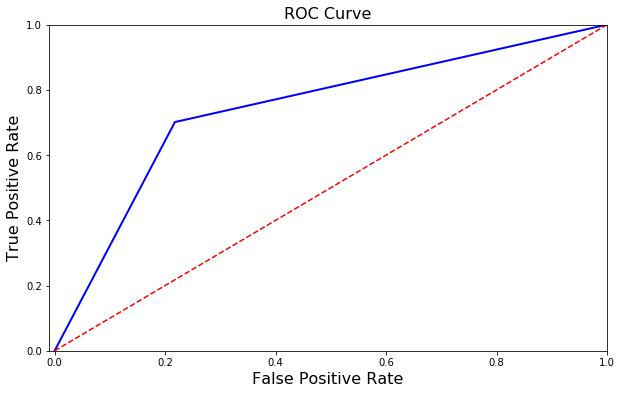

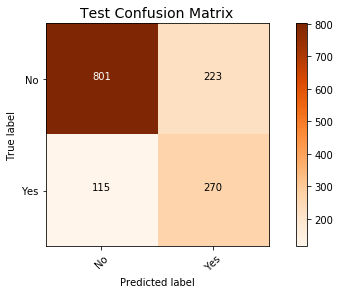

In [41]:
metrics_dict = modelling_workflow_function(X_train, X_test, y_train, y_test)

In [42]:
metrics_dict
# Its not an improvement

Counter({'Pos_Precision': 0.5476673427991886,
         'Pos_Recall': 0.7012987012987013,
         'Pos_F1': 0.6150341685649202,
         'ROC AUC': 0.82,
         'TN': 801,
         'TP': 270,
         'FN': 115,
         'FP': 223,
         'Precision_at_Recall': 0.44625850340136053})

In [43]:
# Lets try a couple of other techniques to amplify the signal

### <a id='63'> Variance Reduction

#### <a id='631'>Binning Numerical Features 

In [44]:
from feature_engine.discretisers import EqualFrequencyDiscretiser

contns_to_discrete_col_list = ['MonthlyCharges']

# Lets mandate that we need 20 categories as the output from the discretizer based on the EDA step
discretizer_obj = EqualFrequencyDiscretiser(q=20, 
                  variables=contns_to_discrete_col_list, return_object=True)

# find the intervals for each of the above
discretizer_obj.fit(X_train)

# Transform the train and test datasets and then overwrite the existing versions
X_train = discretizer_obj.transform(X_train)
X_test = discretizer_obj.transform(X_test)

X_train.head()
# note that the discretized column by default gets treated as an object type eventhough its a number

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges_na,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,
4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,8,0,1336.80
6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),16,0,5129.45
3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,3,0,23.45
2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,9,0,237.95
2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),8,1,1410.80


#### <a id = 632> Performance Testing on Binning

The size of the resampled train sets are as follows:
(4888, 20) 2775
Has a Test accuracy of 76.0 % 
              precision    recall  f1-score   support

          No       0.88      0.78      0.82      1024
         Yes       0.55      0.72      0.62       385

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409

The ROC AUC Score on Test set is 0.82
Confusion matrix, without normalization
[[794 230]
 [107 278]]


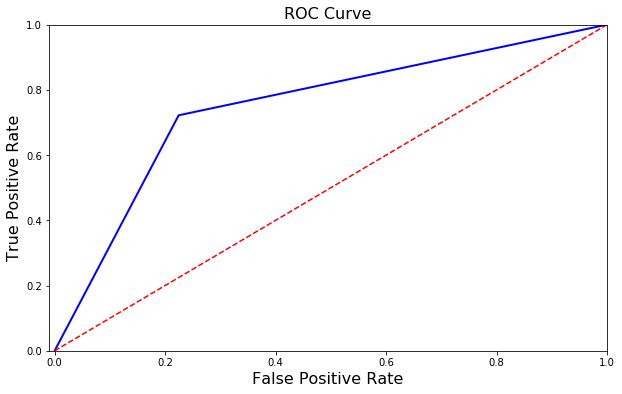

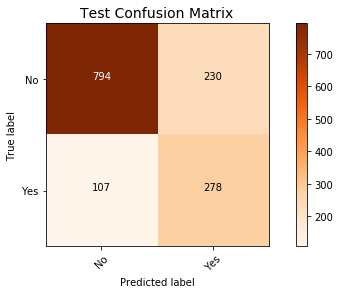

In [45]:
metrics_dict = modelling_workflow_function(X_train, X_test, y_train, y_test)

In [46]:
metrics_dict

Counter({'Pos_Precision': 0.547244094488189,
         'Pos_Recall': 0.7220779220779221,
         'Pos_F1': 0.6226203807390819,
         'ROC AUC': 0.82,
         'TN': 794,
         'TP': 278,
         'FN': 107,
         'FP': 230,
         'Precision_at_Recall': 0.4568245125348189})

#### Its a small improvement from before but still lower than with just the resampling

Homework to the viewer is to get the discretization through a custom function that takes the mean value for each mini-histogram seen in the MonthlyCharges
ie the mean values will be 20, 25, 30, etc.

In [47]:
# monthly_charges_bins = [15]
# monthly_charges_bins = monthly_charges_bins + (list(np.arange(22.5,117.5,5)))
# monthly_charges_bins.append(125)
# cut_point_list = list(range(20,120,5))

# X_train['MonthlyCharges'] = pd.cut(X_train['MonthlyCharges'], 
#                                           bins=monthly_charges_bins, labels=cut_point_list)
# X_test['MonthlyCharges'] = pd.cut(X_test['MonthlyCharges'], 
#                                           bins=monthly_charges_bins, labels=cut_point_list)

# # Change the MonthlyCharges column into float from str    
# destination_data_type_col_dict = {'MonthlyCharges':float}

# for col, data_type in destination_data_type_col_dict.items():
#     X_train[col] = X_train[col].astype(data_type)
#     X_test[col] = X_test[col].astype(data_type)
    
# X_train.dtypes

# # numerical_distribution_function(X_train[['MonthlyCharges']], bins=120)
# metrics_dict = modelling_workflow_function(X_train, X_test, y_train, y_test)
# metrics_dict

#### <a id='633'> Rare Label Encoding - Categorical Features

In [48]:
object_col_list = list(X_train.select_dtypes(include=['object']).columns)
object_col_list = list(set(object_col_list) - set(['MonthlyCharges']))
object_col_list
# I have deliberately removed the MonthlyCharges because I know that its a number

['PaymentMethod',
 'StreamingMovies',
 'DeviceProtection',
 'PaperlessBilling',
 'StreamingTV',
 'gender',
 'PhoneService',
 'TechSupport',
 'Contract',
 'MultipleLines',
 'OnlineBackup',
 'OnlineSecurity',
 'Dependents',
 'InternetService',
 'Partner']

In [49]:
# This step is needed if you want to convert all categorical columns to ordinal encoded numbers
# Works only with tree-based algorithms but not for linear models or neural nets

from feature_engine.categorical_encoders import RareLabelCategoricalEncoder

# Filter the above object columns based on the object data type
# object_col_list = list(X_train.select_dtypes(include=['object']).columns)

# First select the features with greater than 2 levels
cat_series = X_train[object_col_list].nunique()
non_binary_cat_col_list = list(cat_series[cat_series>2].index)

# This takes of the situation where the % occurrence is relatively high in the levels
# ie where none of the levels are lower than 5% cutoff
for col in non_binary_cat_col_list:

    print(col)
    
    level_perc_dict = (X_train.groupby(col)[col].count()/len(X_train)).to_dict()
    
    # Get the level with the lowest percentage of occurrence
    lowest_occurrence_level = min(level_perc_dict, key=level_perc_dict.get)
    
#     print(lowest_occurrence_level)
    
    # Replace the lowest level of the train with rare
    X_train[col] = np.where(X_train[col].isin([lowest_occurrence_level]), 'Rare', X_train[col])
    
    # Repeat for the test (notice how the lowest level is from the train data)
    X_test[col] = np.where(X_test[col].isin([lowest_occurrence_level]), 'Rare', X_test[col])
    
# If I had just used the RareLabelCategoricalEncoder, then I would be screwed when Test contains levels
# not seen in the train set for those features that are relatively well balanced and above 5% in train

#### This takes care of those levels that are genuinely too rare

# Instantiate the encoder from the Feature Engine
rare_encoder_obj = RareLabelCategoricalEncoder(tol=0.05, 
                                               n_categories=3, variables=non_binary_cat_col_list)


rare_encoder_obj.fit(X_train)

# Transform both the train and test objects
X_train = rare_encoder_obj.transform(X_train)
X_test = rare_encoder_obj.transform(X_test)


PaymentMethod
StreamingMovies
DeviceProtection
StreamingTV
TechSupport
Contract
MultipleLines
OnlineBackup
OnlineSecurity
InternetService


#### <a id = 634> Performance Testing on Cardinality Reduction

The size of the resampled train sets are as follows:
(4883, 20) 2773
Has a Test accuracy of 77.0 % 
              precision    recall  f1-score   support

          No       0.88      0.79      0.83      1024
         Yes       0.56      0.72      0.63       385

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409

The ROC AUC Score on Test set is 0.82
Confusion matrix, without normalization
[[804 220]
 [106 279]]


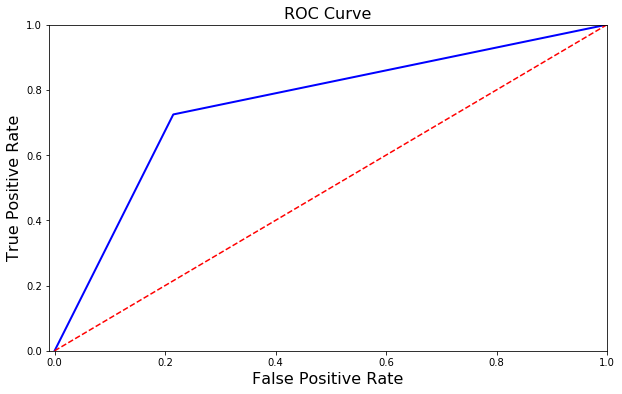

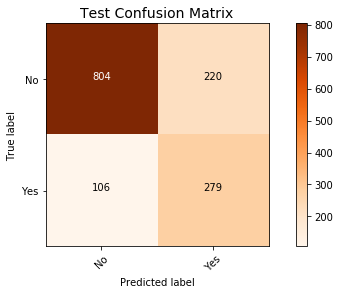

Counter({'Pos_Precision': 0.5591182364729459,
         'Pos_Recall': 0.7246753246753247,
         'Pos_F1': 0.6312217194570136,
         'ROC AUC': 0.82,
         'TN': 804,
         'TP': 279,
         'FN': 106,
         'FP': 220,
         'Precision_at_Recall': 0.4470108695652174})

In [51]:
metrics_dict = modelling_workflow_function(X_train, X_test, y_train, y_test)
metrics_dict

## <a id='7'> Conclusion

The results are slightly worse than with the resampling effort, hence I am going to use the SMOTEENN on the cleaned dataframe from Day1 for future analysis

## <a id='8'>References</a> 

A very good Kaggle notebook for understanding SMOTE 
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

Understanding IQR and Z scores for Outlier detection and removal
http://colingorrie.github.io/outlier-detection.html

In [42]:
# In future weeks, we are going to try out feature engineering to synthetically increase the number of features available